In [291]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import statistics

In [292]:
def plot_image(img):
    print(img.shape)
    plt.axis("off")
    plt.imshow(img)

def binarizar_con_umbral(gray_img, umbral):
    _, thresh = cv2.threshold(gray_img, umbral, 255, cv2.THRESH_BINARY)
    return thresh

def plot_9_umbrales(gray_img):
    umbrales = np.linspace(20, 235, 9, dtype=np.uint8)
    fig, axes = plt.subplots(3, 3, figsize=(10, 10))
    fig.subplots_adjust(hspace=0.5, wspace=0.5)

    for i, umbral in enumerate(umbrales):
        thresh = binarizar_con_umbral(gray_img, umbral)
        
        row = i // 3
        col = i % 3
        axes[row, col].imshow(thresh, cmap='gray')
        axes[row, col].set_title(f'Umbral {umbral}')
        axes[row, col].axis('off')
    
    plt.tight_layout()
    plt.show()

(700, 960, 3)


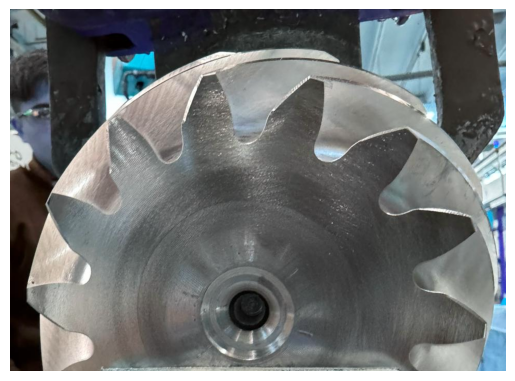

In [293]:
img = cv2.imread("BLANDO/DIENTE_2.jpeg")[50:750,:,:]
img2 = img.copy()
plot_image(img)

(700, 960)


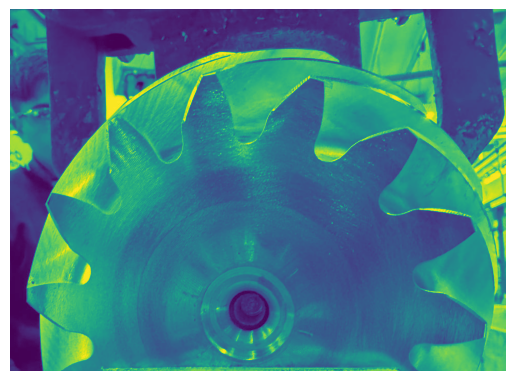

In [294]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plot_image(gray)

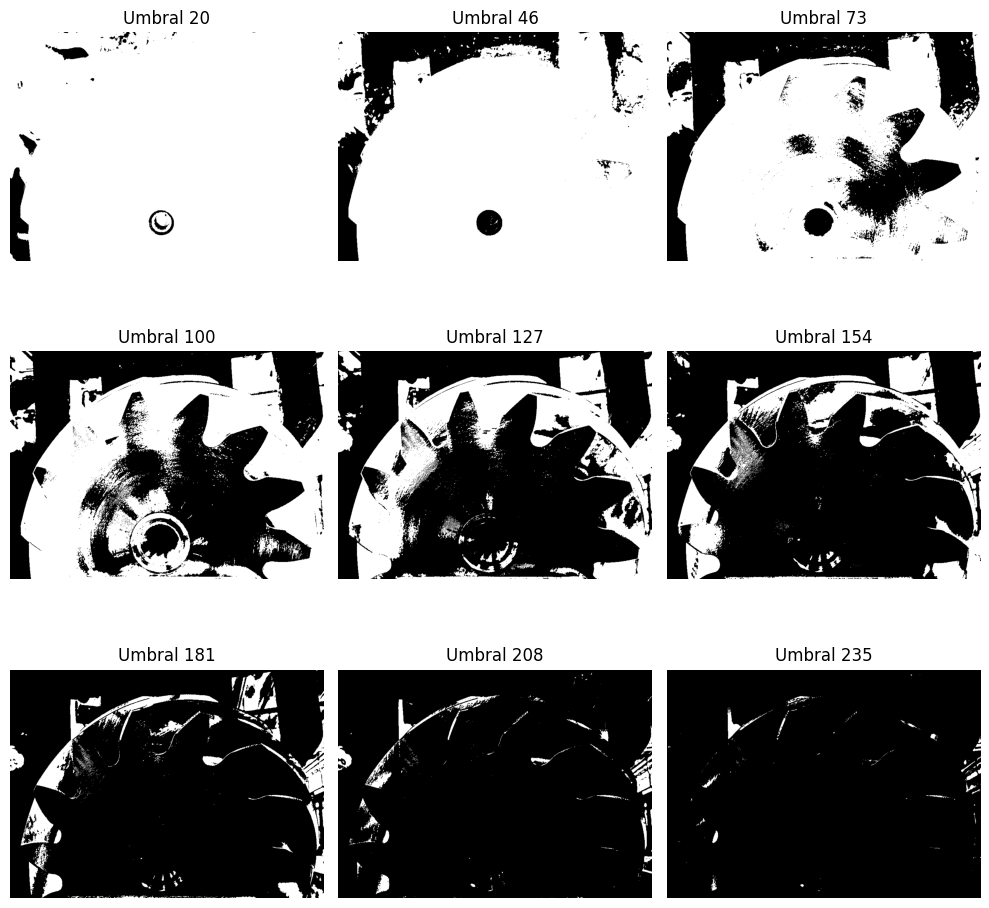

In [295]:
plot_9_umbrales(gray)

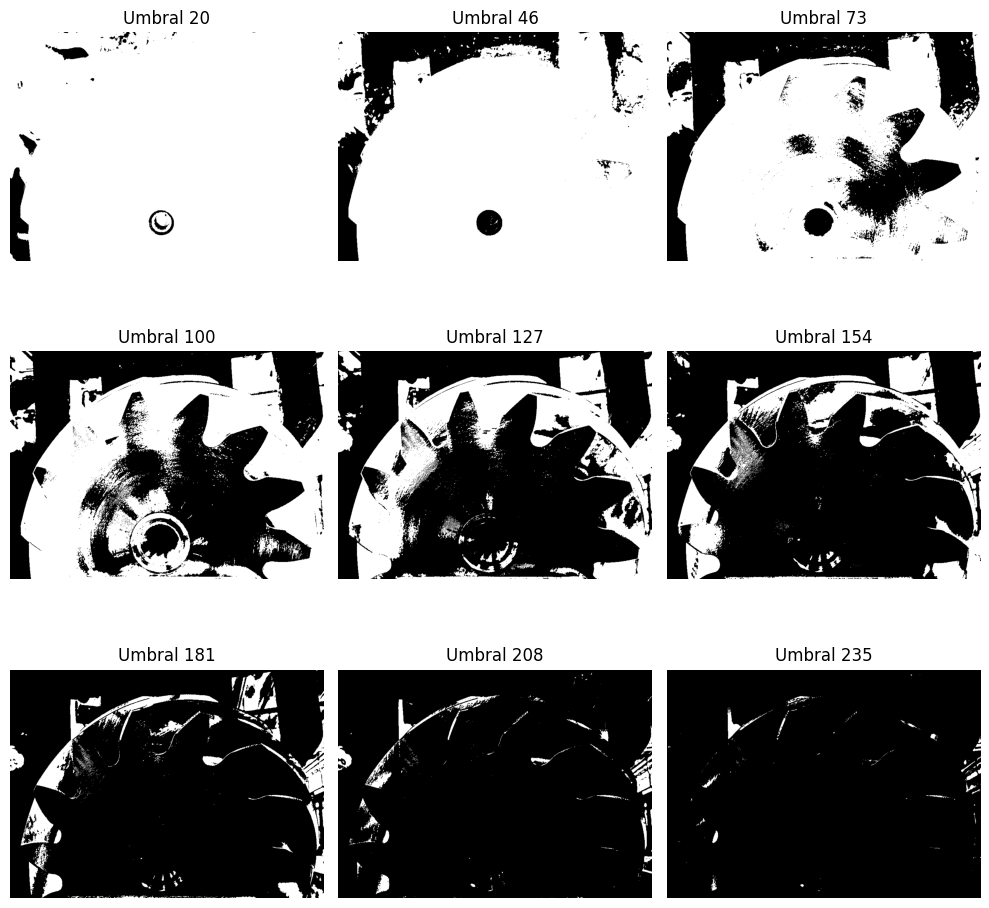

In [296]:
blur = cv2.GaussianBlur(img,(5,5),0)
gray_blur = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plot_9_umbrales(gray_blur)

(700, 960)


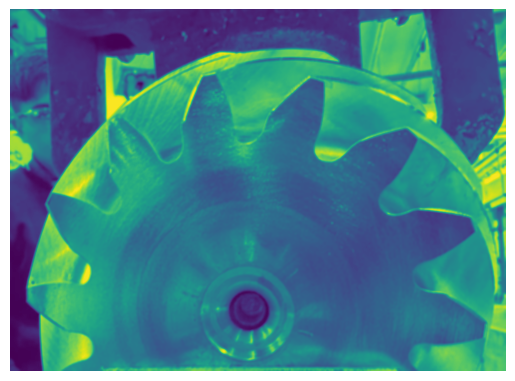

In [297]:
K = np.ones((5, 5), np.float32) / 25
HMG = cv2.filter2D(img2, -1, K)
BL = cv2.blur(img2, (5, 5))
GB = cv2.GaussianBlur(img2, (5, 5), 0)
gray = cv2.cvtColor(HMG,cv2.COLOR_BGR2GRAY)
plot_image(gray)

(700, 960)


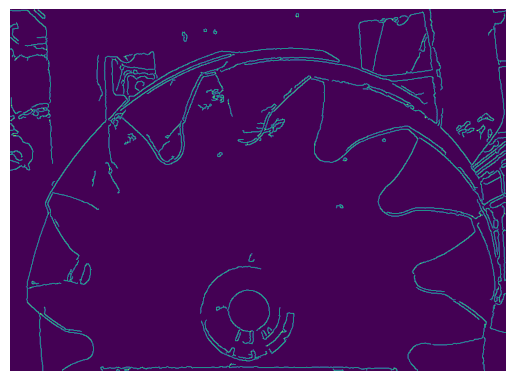

In [298]:

edges = cv2.Canny(gray,10,120)
plot_image(edges)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-332.0..336.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-8599.0..10546.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-9912.0..9421.0].


(Text(0.5, 1.0, 'Sobel Y'), ([], []), ([], []))

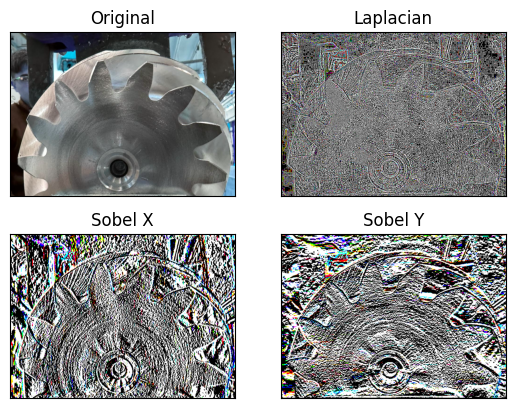

In [299]:
laplacian = cv2.Laplacian(img,cv2.CV_64F)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)
 
plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-332.0..336.0].


(700, 960, 3)


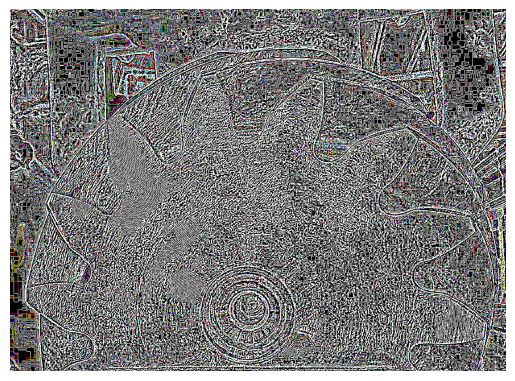

In [303]:
plot_image(laplacian)

In [300]:
edges = cv2.Canny(sobely[:,:,0],10,120)
plot_image(edges)

error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\canny.cpp:829: error: (-215:Assertion failed) _src.depth() == CV_8U in function 'cv::Canny'


In [ ]:
_, thresh = cv2.threshold(gray, 170, 255, cv2.THRESH_BINARY)
contours, _ = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

(700, 960, 3)


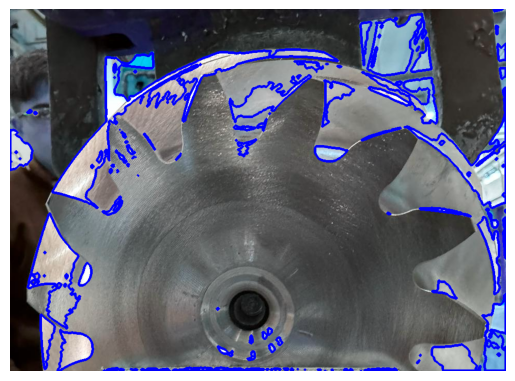

In [ ]:
cv2.drawContours(img ,contours, -1, (0, 0, 255), 4)
plot_image(img)

In [ ]:
min_w = 650
max_w = 900
min_h = 750
max_h = 900
largest_area = 0
largest_contour = None

canvas = np.ones_like(img)

# Iterar sobre los contornos
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    aspect_ratio = float(w) / h
    area = cv2.contourArea(cnt)
    
    # Condiciones para seleccionar candidatos
    if (max_w > w > min_w) and (max_h > h > min_h):
        # Encontrar el contorno más grande
        if area > largest_area:
            largest_area = area
            largest_contour = cnt

# Verificar que se encontró al menos un candidato
if largest_contour is not None:
    # Calcular el centroide del contorno más grande
    M = cv2.moments(largest_contour)
    if M['m00'] != 0:
        cx = int(M['m10'] / M['m00'])
        cy = int(M['m01'] / M['m00'])
        centroid = (cx, cy)
        print("El centroide del contorno más grande encontrado es:", centroid)
        
        # Dibujar un punto en el centroide sobre canvas
        canvas = np.zeros_like(img)
        # cv2.circle(canvas, (cx, cy), 5, (0,255, 0), -1)  # Dibuja un círculo rojo en el centroide
        
        # Dibujar el contorno más grande sobre canvas
        cv2.drawContours(canvas, [largest_contour],contourIdx=-1, color=(255, 255, 255), thickness=cv2.FILLED)

        
        # Calcular el radio del círculo
        dist_sum = 0
        num_points = 0
        for point in largest_contour:
            dist = np.sqrt((point[0][0] - cx)**2 + (point[0][1] - cy)**2)
            dist_sum += dist
            num_points += 1
        
        if num_points > 0:
            avg_dist = dist_sum / num_points
            radius = int(avg_dist*0.95)
            # Dibujar el círculo en el centroide con el radio calculado
            cv2.circle(canvas, (cx, cy), radius, (0, 0, 0), -1)

        # Mostrar la imagen resultante
        plot_image(canvas)
else:
    print("No se encontraron candidatos que cumplan con los criterios de tamaño.")
    print("No se encontró ningún centroide válido.")

No se encontraron candidatos que cumplan con los criterios de tamaño.
No se encontró ningún centroide válido.


(700, 960, 3)
''''''''''''''''''''''''''''''
Media: nan
Mediana: nan
Varianza: nan
Desviación estándar: nan
Máximo: nan
Mínimo: nan
Moda: nan
''''''''''''''''''''''''''''''
No se pudieron encontrar dientes


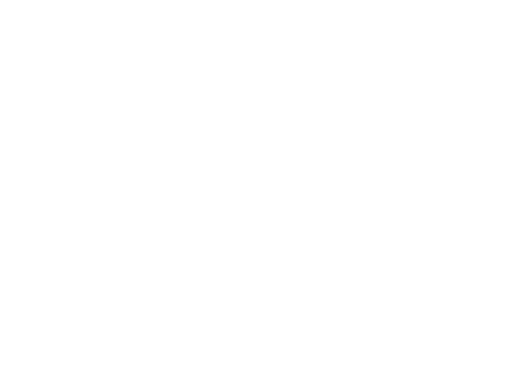

In [ ]:
area_min = 1500
area_max = 1950
teeth_gray = cv2.cvtColor(canvas,cv2.COLOR_BGR2GRAY)
_,thresh_teeh = cv2.threshold(teeth_gray,110,255,cv2.THRESH_BINARY)
canvas_teeth, _ = cv2.findContours(thresh_teeh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
canvas_white = np.ones_like(img)*255
cv2.drawContours(canvas_white ,canvas_teeth,contourIdx=-1,color=(0,0,0), thickness=cv2.FILLED)
plot_image(canvas_white)

teeth_list = []
area_list = []

for tooth in canvas_teeth:
    x, y, w, h = cv2.boundingRect(tooth)  # Usar 'tooth' en lugar de 'cnt'
    aspect_ratio = float(w) / h
    area = cv2.contourArea(tooth)
    
    if area_max >= area >= area_min:
        area_list.append(area)
        teeth_list.append(tooth)


media = statistics.mean(area_list) if area_list else float('nan')
mediana = statistics.median(area_list) if area_list else float('nan')
varianza = np.var(area_list) if area_list else float('nan')
desviacion_estandar = np.std(area_list) if area_list else float('nan')
maximo = max(area_list) if area_list else float('nan')
minimo = min(area_list) if area_list else float('nan')
moda = statistics.mode(area_list) if area_list else float('nan')

print("''''''''''''''''''''''''''''''")
print(f"Media: {media}")
print(f"Mediana: {mediana}")
print(f"Varianza: {varianza}")
print(f"Desviación estándar: {desviacion_estandar}")
print(f"Máximo: {maximo}")
print(f"Mínimo: {minimo}")
print(f"Moda: {moda}")
print("''''''''''''''''''''''''''''''")
if teeth_list:
    print("Se encontraron ", len(teeth_list), " dientes en el engranaje")
    print("''''''''''''''''''''''''''''''")
    if len(teeth_list) == 32:
        print("Engranaje correcto")
    else:
        print("Engranaje equivocado")
else:
    print("No se pudieron encontrar dientes")
